**L065_LDA.ipynb**

2024 JUN 05

Tershire

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# data

In [4]:
from sklearn.datasets import load_iris

In [5]:
iris_dataset = load_iris()

columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
iris_df = pd.DataFrame(iris_dataset.data, columns=columns)
iris_df["target"] = iris_dataset.target

In [6]:
display(iris_df.head(3))

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


## visualization

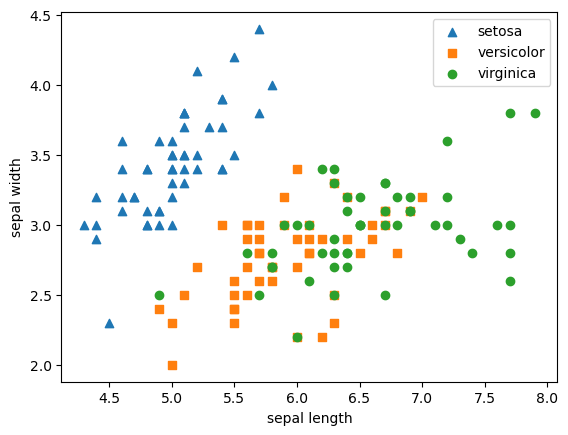

In [7]:
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x = iris_df[iris_df["target"] == i]["sepal_length"]
    y = iris_df[iris_df["target"] == i]["sepal_width"]
    plt.scatter(x, y, marker=marker, label=iris_dataset.target_names[i])

plt.legend()
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.show()

# preprocessing

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
X_scaled = StandardScaler().fit_transform(iris_df.iloc[:, :-1])

In [10]:
print(type(X_scaled), X_scaled.shape)
print(X_scaled[:3, :])

<class 'numpy.ndarray'> (150, 4)
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]]


# LDA

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [13]:
lda = LinearDiscriminantAnalysis(n_components=2)

lda.fit(X_scaled, iris_dataset.target)
X_lda = lda.transform(X_scaled)

In [19]:
print(X_pca.shape)

(150, 2)


## conversion to data frame

In [23]:
lda_columns = ["lda_feature_1", "lda_feature_2"]
iris_df_lda = pd.DataFrame(X_lda, columns=lda_columns)
iris_df_lda["target"] = iris_dataset.target

In [24]:
display(iris_df_lda.head(3))

,lda_feature_1,lda_feature_2,target
0,8.061800,-0.300421,0
1,7.128688,0.786660,0
2,7.489828,0.265384,0


## visualization

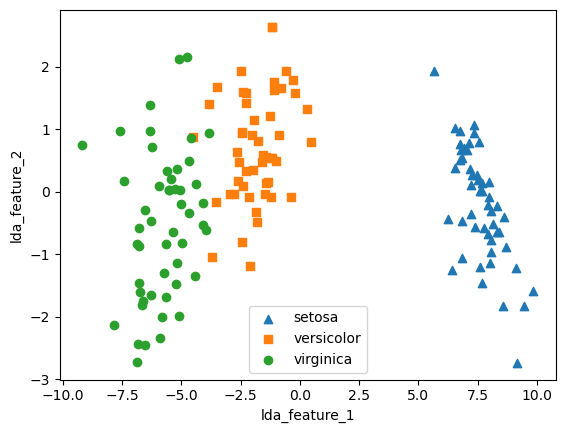

In [26]:
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x = iris_df_lda[iris_df_lda["target"] == i]["lda_feature_1"]
    y = iris_df_lda[iris_df_lda["target"] == i]["lda_feature_2"]
    plt.scatter(x, y, marker=marker, label=iris_dataset.target_names[i])

plt.legend()
plt.xlabel("lda_feature_1")
plt.ylabel("lda_feature_2")
plt.show()

# original features vs LDA features

**random forest**

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [28]:
classifier = RandomForestClassifier(random_state=156)

## original features

In [29]:
X, Y = iris_dataset.data, iris_dataset.target

scores = cross_val_score(classifier, X, Y, scoring="accuracy", cv=3)

print(f"cross validation accuracy scores: {scores}")
print(f"mean cross valication accuracy score: {np.mean(scores)}")

cross validation accuracy scores: [0.98 0.94 0.96]
mean cross valication accuracy score: 0.96


## LDA features

In [31]:
X_lca = iris_df_lda[["lda_feature_1", "lda_feature_2"]]

scores = cross_val_score(classifier, X_lda, Y, scoring="accuracy", cv=3)

print(f"cross validation accuracy scores: {scores}")
print(f"mean cross valication accuracy score: {np.mean(scores)}")

cross validation accuracy scores: [1.   0.9  0.94]
mean cross valication accuracy score: 0.9466666666666667
